In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
cerealDF = pd.read_excel('/content/drive/My Drive/DataScience/cereal.xlsx', header=1)
cerealDF.head()

,name,Manufacturer,type,calories per serving,grams of protein,grams of fat,milligrams of sodium,grams of dietary fiber,grams of complex carbohydrates,grams of sugars,milligrams of potassium,vitamins and minerals (% of FDA recommendation),Display shelf,Weight in ounces per one serving,Number of cups in one serving,Rating of cereal
0,Apple Cinnamon Cheerios,General Mills,Cold,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
1,Basic 4,General Mills,Cold,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
2,Cheerios,General Mills,Cold,110,6,2,290,2.0,17.0,1,105,25,1,1.00,1.25,50.764999
3,Cinnamon Toast Crunch,General Mills,Cold,120,1,3,210,0.0,13.0,9,45,25,2,1.00,0.75,19.823573
4,Clusters,General Mills,Cold,110,3,2,140,2.0,13.0,7,105,25,3,1.00,0.50,40.400208


In [5]:
cerealDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   name                                             77 non-null     object 
 1   Manufacturer                                     77 non-null     object 
 2   type                                             77 non-null     object 
 3   calories per serving                             77 non-null     int64  
 4   grams of protein                                 77 non-null     int64  
 5   grams of fat                                     77 non-null     int64  
 6   milligrams of sodium                             77 non-null     int64  
 7   grams of dietary fiber                           77 non-null     float64
 8   grams of complex carbohydrates                   77 non-null     float64
 9   grams of sugars                   

In [6]:
#Change the names of columns to exclude spaces
cerealDF = cerealDF.rename(columns={'calories per serving': 'cal_per_serving', 'grams of protein': 'grams_of_protein', 'grams of fat': 'grams_of_fat', 'milligrams of sodium': 'mg_of_sodium', 'grams of dietary fiber': 'grams_of_dietaryFiber', 'grams of complex carbohydrates': 'grams_of_complexCarbs', 'grams of sugars': 'grams_of_sugars', 'milligrams of potassium': 'mg_of_potassium', 'vitamins and minerals (% of FDA recommendation)': 'vitamins_mineras', 'Display shelf': 'display_shelf', 'weight in ounces per one serving': 'weight_oz_perServing', 'Number of cups in one serving': 'num_of_cupsPerServing', 'Rating of cereal': 'cereal_rating'})

In [11]:
cerealDF = cerealDF.rename(columns={'Weight in ounces per one serving': 'weight_oz_perServing'})

In [12]:
cerealDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   77 non-null     object 
 1   Manufacturer           77 non-null     object 
 2   type                   77 non-null     object 
 3   cal_per_serving        77 non-null     int64  
 4   grams_of_protein       77 non-null     int64  
 5   grams_of_fat           77 non-null     int64  
 6   mg_of_sodium           77 non-null     int64  
 7   grams_of_dietaryFiber  77 non-null     float64
 8   grams_of_complexCarbs  77 non-null     float64
 9   grams_of_sugars        77 non-null     int64  
 10  mg_of_potassium        77 non-null     int64  
 11  vitamins_minerals      77 non-null     int64  
 12  display_shelf          77 non-null     int64  
 13  weight_oz_perServing   77 non-null     float64
 14  num_of_cupsPerServing  77 non-null     float64
 15  cereal_r

In [45]:
#replacing the negatives for quaker oats after googling it
cerealDF = cerealDF.replace(-1, 1)


In [46]:
cerealDF = cerealDF.replace(-1.0, 1.0)

In [13]:
cerealDF['display_shelf'].value_counts()

3    36
2    21
1    20
Name: display_shelf, dtype: int64

In [14]:
cerealDF['weight_oz_perServing'].value_counts()

1.00    64
1.33     5
0.50     2
1.50     2
1.25     2
1.30     1
0.83     1
Name: weight_oz_perServing, dtype: int64

In [15]:
cerealDF['num_of_cupsPerServing'].value_counts()

1.00    30
0.75    16
0.67    13
0.50     7
0.33     3
0.88     2
0.80     1
1.13     1
1.33     1
0.25     1
1.50     1
1.25     1
Name: num_of_cupsPerServing, dtype: int64

In [48]:
cerealDF[['name','cal_per_serving','grams_of_sugars']].sort_values(by=['grams_of_sugars'], ascending=False)

,name,cal_per_serving,grams_of_sugars
43,Smacks,110,15
53,Golden Crisp,100,15
58,Post Nat. Raisin Bran,120,14
24,Apple Jacks,110,14
16,Total Raisin Bran,140,14
...,...,...,...
48,Shredded Wheat spoon size,90,0
47,Shredded Wheat 'n'Bran,90,0
46,Shredded Wheat,80,0
23,All-Bran with Extra Fiber,50,0


In [50]:
#to get a list of cereals and their cal per serving
cerealCal = cerealDF.groupby(['name', 'cal_per_serving'])['cal_per_serving'].sum()
cereals = list(cerealCal.index.to_list())
cerealCalList = []
for index, tuple in enumerate(cereals):
  element = tuple[0]
  cerealCalList.append(element)




In [51]:
cerealCal.sort_index(level=1, ascending=False)

name                               cal_per_serving
Mueslix Crispy Blend               160                160
Muesli Raisins; Peaches; & Pecans  150                150
Muesli Raisins; Dates; & Almonds   150                150
Total Raisin Bran                  140                140
Nutri-Grain Almond-Raisin          140                140
                                                     ... 
All-Bran                           70                  70
100% Bran                          70                  70
Puffed Wheat                       50                  50
Puffed Rice                        50                  50
All-Bran with Extra Fiber          50                  50
Name: cal_per_serving, Length: 77, dtype: int64

In [52]:
#to get a list of cereals and their sugars per serving
cerealSug = cerealDF.groupby(['name', 'grams_of_sugars'])['grams_of_sugars'].sum()
sorted(cerealSug)
cerealS = list(cerealSug.index.tolist())
cerealSugList = []
for index, tuple in enumerate(cerealS):
  el = tuple[0]
  cerealSugList.append(el)

cerealSug

name                       grams_of_sugars
100% Bran                  6                   6
100% Natural Bran          8                   8
All-Bran                   5                   5
All-Bran with Extra Fiber  0                   0
Almond Delight             8                   8
                                              ..
Triples                    3                   3
Trix                       12                 12
Wheat Chex                 3                   3
Wheaties                   3                   3
Wheaties Honey Gold        8                   8
Name: grams_of_sugars, Length: 77, dtype: int64

In [25]:
cerealCarbs = cerealDF.groupby(['name', 'grams_of_complexCarbs'])['grams_of_complexCarbs'].sum()
sorted(cerealCarbs)
cerealC = list(cerealCarbs.index.tolist())
cerealCarbList = []
for index, tuple in enumerate(cerealC):
  x = tuple[0]
  cerealCarbList.append(x)



In [53]:
cerealDF['grams_of_dietaryFiber'].value_counts()

0.0     19
1.0     16
3.0     15
2.0     10
5.0      4
4.0      4
1.5      3
2.7      1
6.0      1
10.0     1
14.0     1
9.0      1
2.5      1
Name: grams_of_dietaryFiber, dtype: int64

Text(0.5, 1.0, 'Grams of Complex Carbs')

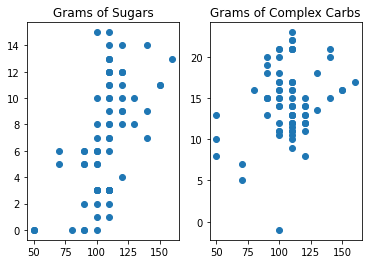

In [54]:
plt.subplot(1, 2, 1);
plt.scatter(cerealCal, cerealSug)
plt.title('Grams of Sugars')

plt.subplot(1,2, 2);
plt.scatter(cerealCal, cerealCarbs)
plt.title('Grams of Complex Carbs')

In [55]:
#Comparing the amount of sugars in hot cereal vs cold cereal
cerealDF.groupby(['type', 'grams_of_sugars'])['grams_of_sugars'].mean()

type  grams_of_sugars
Cold  0                   0
      1                   1
      2                   2
      3                   3
      4                   4
      5                   5
      6                   6
      7                   7
      8                   8
      9                   9
      10                 10
      11                 11
      12                 12
      13                 13
      14                 14
      15                 15
Hot   0                   0
      1                   1
      3                   3
Name: grams_of_sugars, dtype: int64

In [56]:
cerealDF.groupby(['Manufacturer'])['grams_of_sugars'].mean()

Manufacturer
American Home Food Products    3.000000
General Mills                  7.954545
Kelloggs                       7.565217
Nabisco                        1.833333
Post                           8.777778
Quaker Oats                    5.500000
Ralston Purina                 6.125000
Name: grams_of_sugars, dtype: float64

In [57]:
shelfToSugar = cerealDF[['display_shelf', 'grams_of_sugars']].sort_values(by=['grams_of_sugars'],ascending=False)
cerealDF.groupby(['Manufacturer'])['num_of_cupsPerServing'].mean()

Manufacturer
American Home Food Products    1.000000
General Mills                  0.875000
Kelloggs                       0.796087
Nabisco                        0.778333
Post                           0.714444
Quaker Oats                    0.823750
Ralston Purina                 0.871250
Name: num_of_cupsPerServing, dtype: float64

# Data Analysis

In [149]:
highSugCereal = cerealDF.sort_values(by=['grams_of_sugars'], ascending=False).head(10)
lowSugCereal = cerealDF.sort_values(by=['grams_of_sugars']).head(10)
highCalCereal = cerealDF.sort_values(by=['cal_per_serving'], ascending=False).head(10)
lowCalCereal = cerealDF.sort_values(by=['cal_per_serving']).head(10)


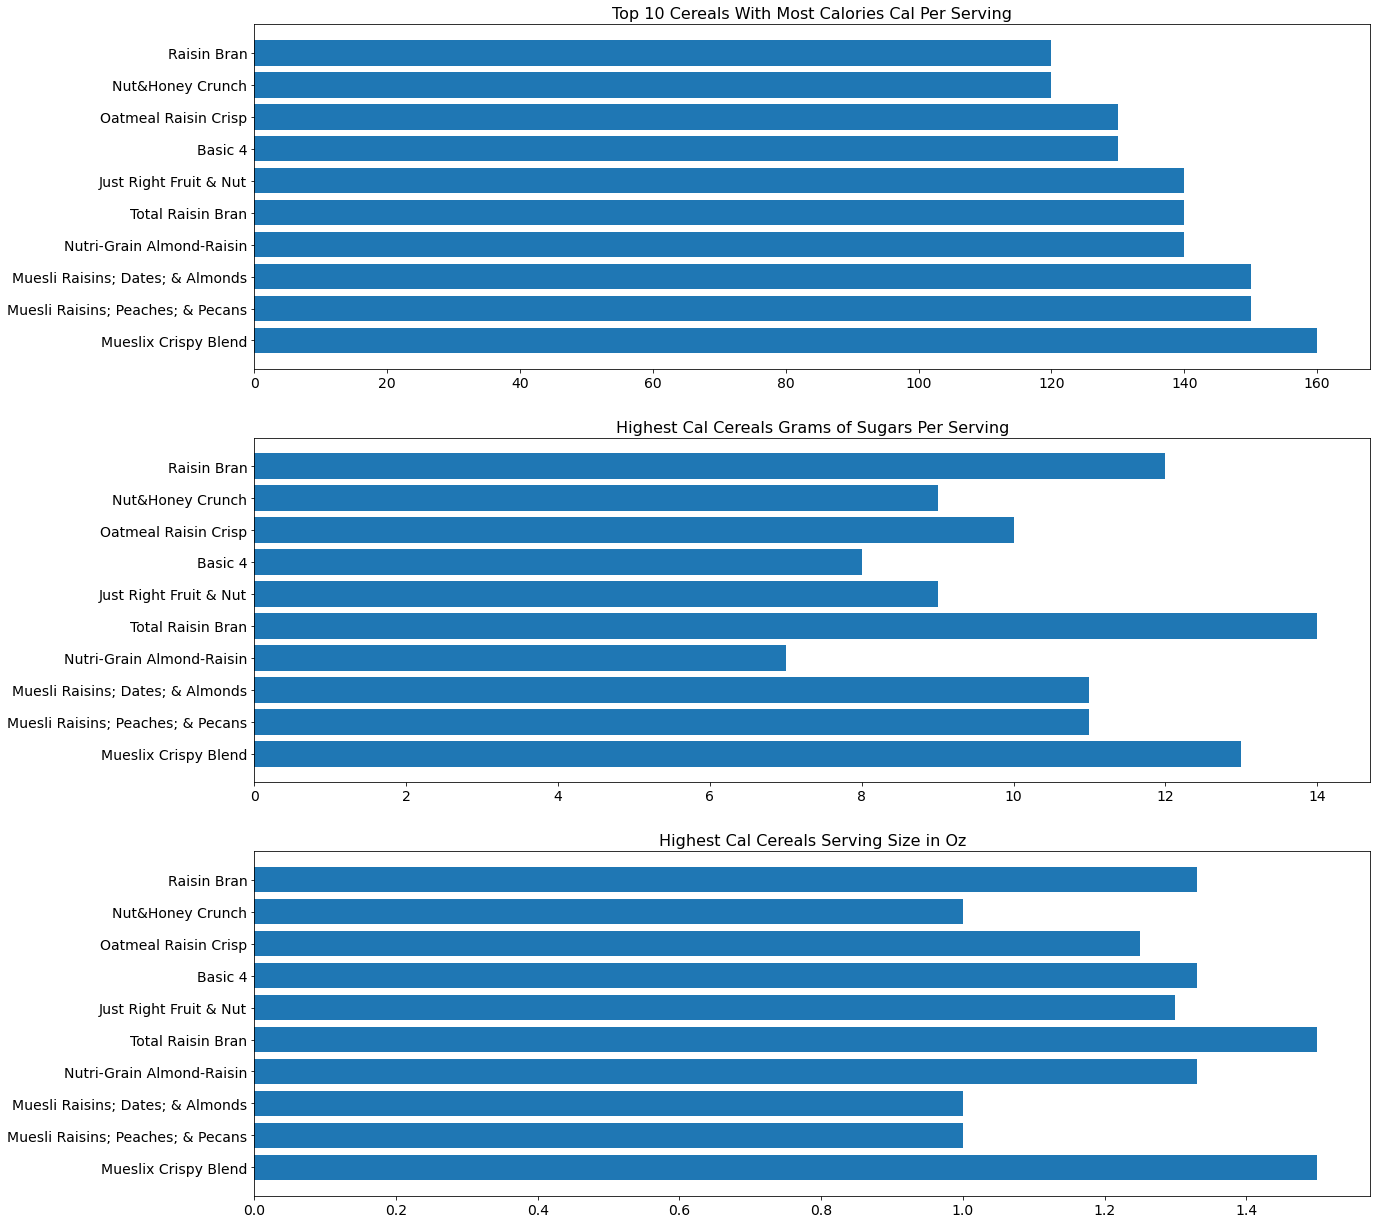

In [154]:
#high calorie cereals
plt.figure(figsize=(20,90))
plt.subplot(12, 1, 1)
plt.barh(highCalCereal['name'], highCalCereal['cal_per_serving']);
plt.title('Top 10 Cereals With Most Calories Cal Per Serving', fontsize= 16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(12, 1, 2)
plt.barh(highCalCereal['name'], highCalCereal['grams_of_sugars']);
plt.title('Highest Cal Cereals Grams of Sugars Per Serving', fontsize= 16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(12, 1, 3)
plt.barh(highCalCereal['name'], highCalCereal['weight_oz_perServing']);
plt.title('Highest Cal Cereals Serving Size in Oz', fontsize= 16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);


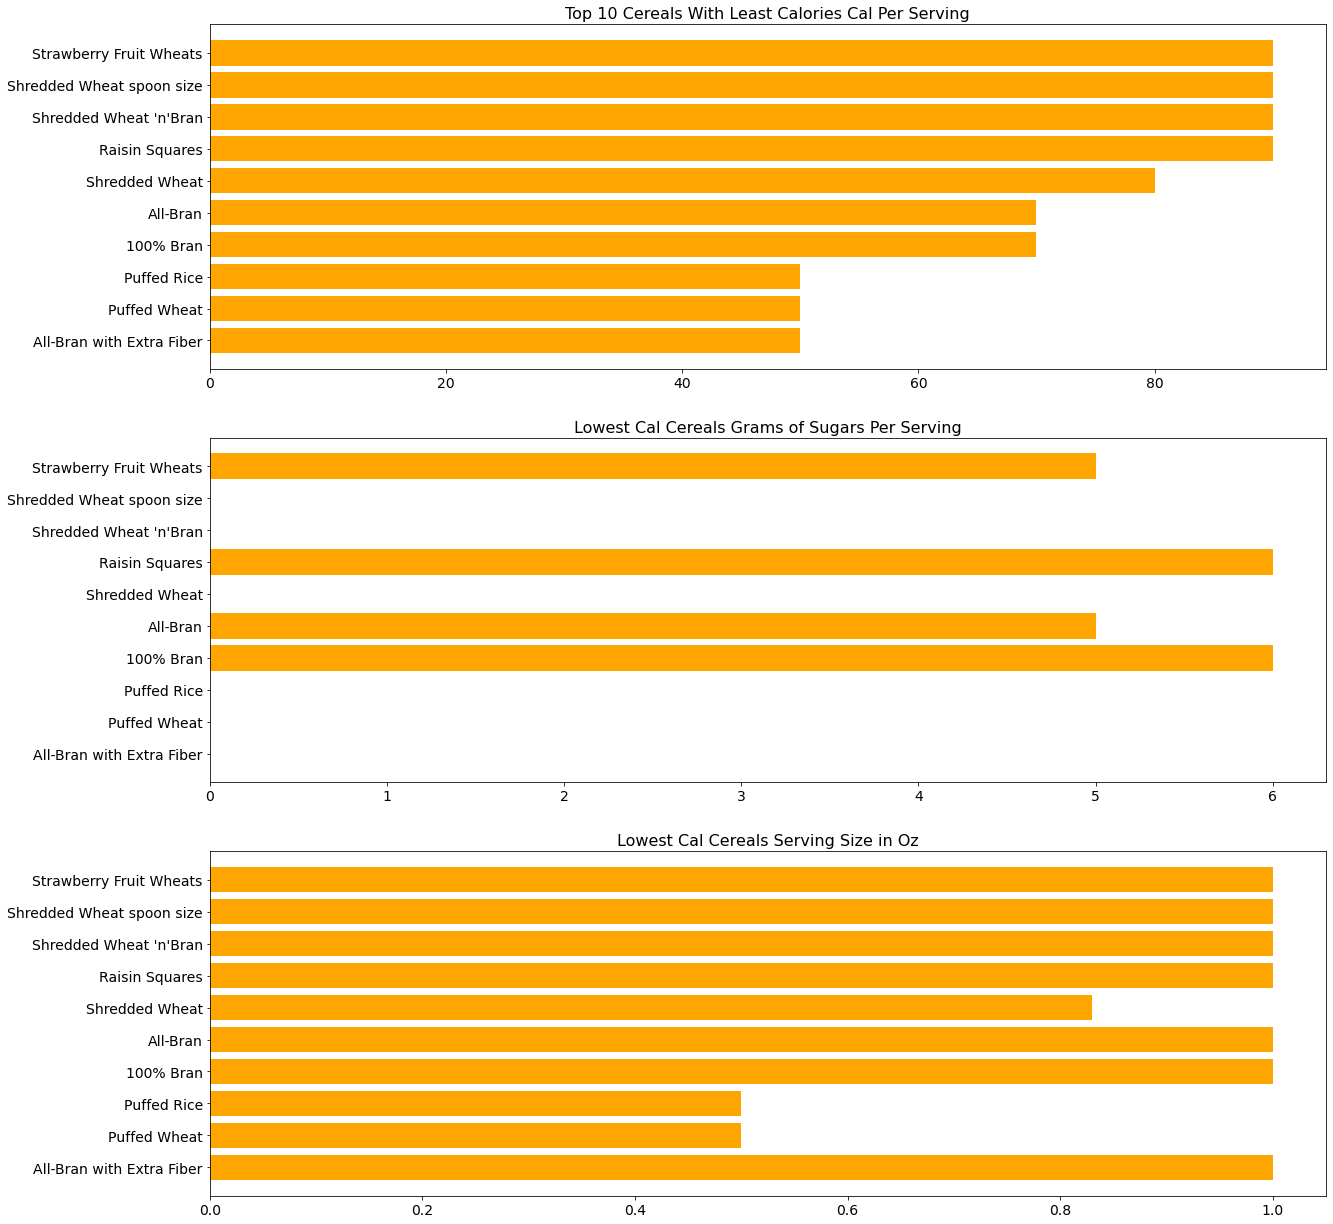

In [151]:
#Low calorie cereals
plt.figure(figsize=(20,90))

plt.subplot(12, 1, 1)
plt.barh(lowCalCereal['name'], lowCalCereal['cal_per_serving'], color='orange');
plt.title('Top 10 Cereals With Least Calories Cal Per Serving', fontsize= 16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(12, 1, 2)
plt.barh(lowCalCereal['name'], lowCalCereal['grams_of_sugars'], color='orange');
plt.title('Lowest Cal Cereals Grams of Sugars Per Serving', fontsize= 16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(12, 1, 3)
plt.barh(lowCalCereal['name'], lowCalCereal['weight_oz_perServing'], color='orange');
plt.title('Lowest Cal Cereals Serving Size in Oz', fontsize= 16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);



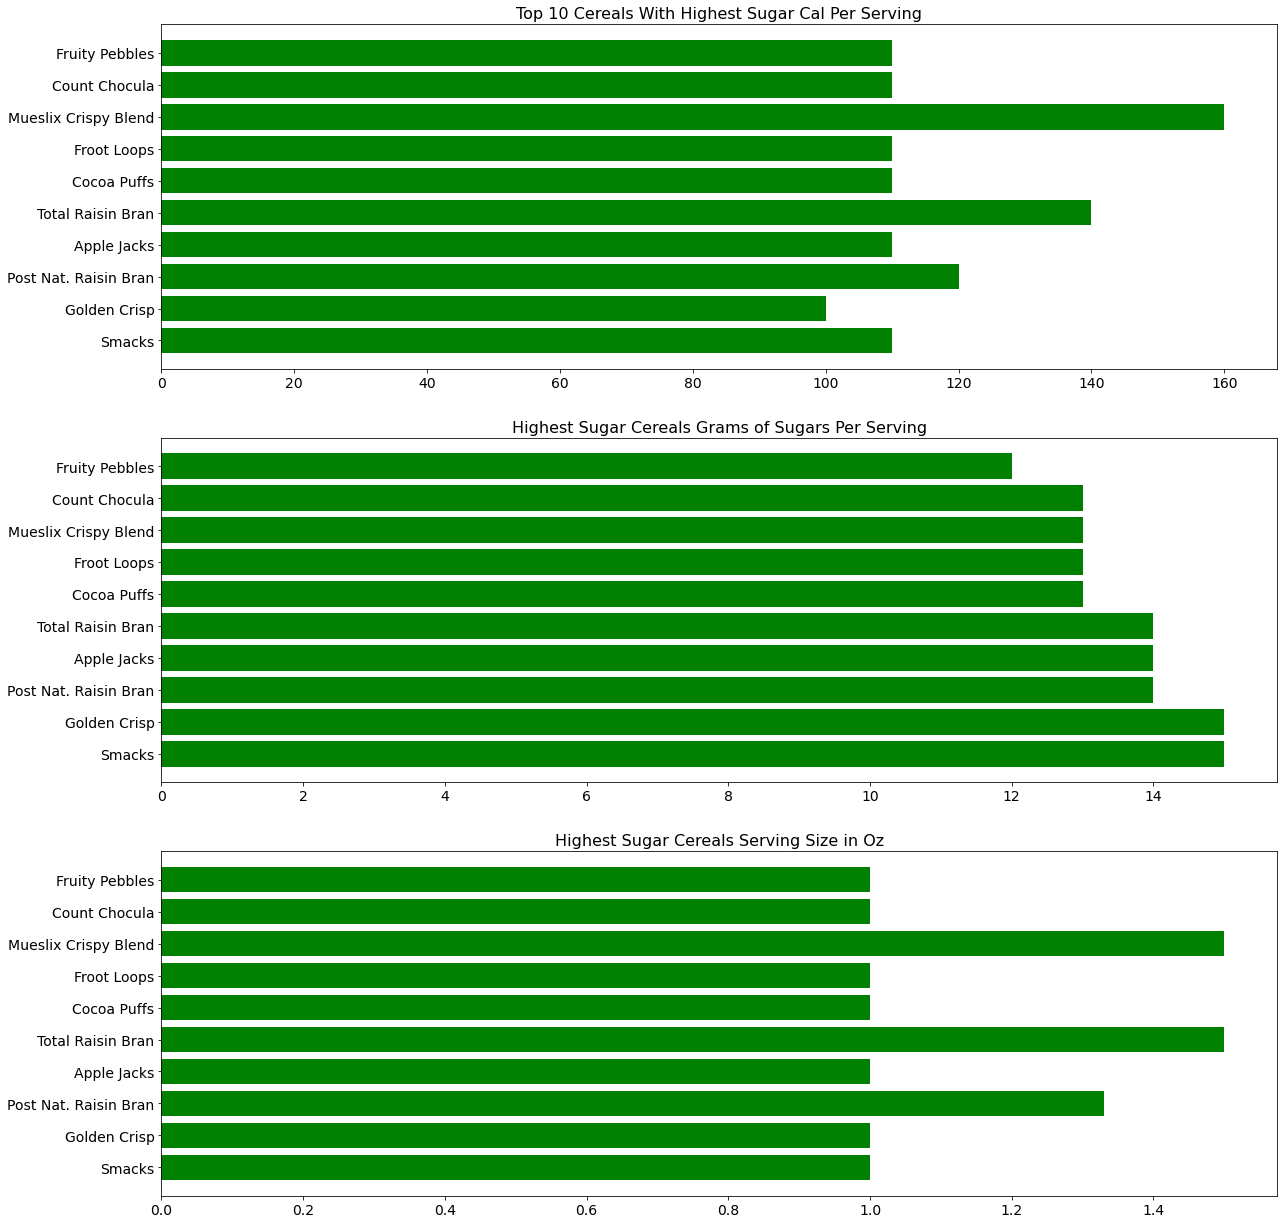

In [152]:
#high calorie cereals
plt.figure(figsize=(20,90))

plt.subplot(12, 1, 1)
plt.barh(highSugCereal['name'], highSugCereal['cal_per_serving'], color='green');
plt.title('Top 10 Cereals With Highest Sugar Cal Per Serving', fontsize= 16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(12, 1, 2)
plt.barh(highSugCereal['name'], highSugCereal['grams_of_sugars'], color='green');
plt.title('Highest Sugar Cereals Grams of Sugars Per Serving', fontsize= 16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(12, 1, 3)
plt.barh(highSugCereal['name'], highSugCereal['weight_oz_perServing'], color='green');
plt.title('Highest Sugar Cereals Serving Size in Oz', fontsize= 16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
